# Линейная алгебра: сходство текстов и аппроксимация функций

## Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:  

*  кошки (животные)
*  UNIX-утилита cat для вывода содержимого файлов
*  версии операционной системы OS X, названные в честь семейства кошачьих  

Ваша задача — **найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке**. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

### Шаг 1

Скачайте файл с предложениями (sentences.txt).

In [0]:
import requests

requests_sentences = requests.get(r'https://d3c33hcgiwev3.cloudfront.net/_3a8d746cf4d86fba2f31586f239d11fd_sentences.txt?Expires=1560902400&Signature=JQAoPnhRiM7g6rW4LEHJzMWC2HXUJQ3ycHN4JA38gq0CKS1fz046SAEF3Zsdq2MnfbRH7lVrX-Yhj7xU69wsH-5fLHN3gnnJtOLriwzcbsvdjurxoDpmY8rmNiFqPoeXllNyJz1~DDxYoc5wfZdTa5HC9pXuAkOaczsJFFFoVNU_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A')
sentences = requests_sentences.text.split('\n')

### Шаг 2

Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower()

In [49]:
sentences =  [line.lower() for line in sentences]
sentences

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

### Шаг 3
Произведите токенизацию, то есть разбиение текстов на слова. Не забудьте удалить пустые слова после разделения.

In [50]:
import re

# Разбиение каждой строки на слова с помощью регулярного выражения
sentences = [re.split('[^a-z]', str(word)) for word in sentences]  
# Преобразование двухмерного списка строк в одномерный список слов
words = sum(sentences,[])
# Удаление "пустых" слов
words = [word for word in words if word]
words[:5] # для примера, срез первых 4-х слов из получившегося списка

['in', 'comparison', 'to', 'dogs', 'cats']

### Шаг 4
Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict


In [51]:
# Переопределим список слов как set, чтобы избавиться от дубликатов
# Контекст задачи позволяет не учитывать формы слов (к примеру cat и cats считать разными словами)
words = set(words)
# Создадим словарь формата ключ: слово, значение: индекс
dict_of_words = {index: word for index, word in enumerate(words)}
print(dict_of_words) # вот как это выглядит

{0: 'catenates', 1: 'allows', 2: 'create', 3: 'drive', 4: 'will', 5: 's', 6: 'every', 7: 'if', 8: 'domestic', 9: 'october', 10: 'since', 11: 'human', 12: 'useful', 13: 'named', 14: 'time', 15: 'chromosomes', 16: 'release', 17: 'between', 18: 'ears', 19: 'marks', 20: 'file', 21: 'are', 22: 'lines', 23: 'received', 24: 'changes', 25: 'however', 26: 'frequency', 27: 'from', 28: 'new', 29: 'similar', 30: 'later', 31: 'according', 32: 'run', 33: 'yosemite', 34: 'sequence', 35: 'displays', 36: 'installs', 37: 'commands', 38: 'concern', 39: 'hear', 40: 'right', 41: 'longer', 42: 'domesticated', 43: 'incremental', 44: 'one', 45: 'off', 46: 'process', 47: 'kg', 48: 'some', 49: 'just', 50: 'left', 51: 'version', 52: 'through', 53: 'bytes', 54: 'you', 55: 'other', 56: 'without', 57: 'count', 58: 'installed', 59: 'community', 60: 'comparison', 61: 'too', 62: 'small', 63: 'in', 64: 'terms', 65: 'also', 66: 'wrong', 67: 'july', 68: 'ancestor', 69: 'releasing', 70: 'now', 71: 'place', 72: 'separate',

### Шаг 5
Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.

In [52]:
import numpy as np
from collections import Counter

n = len(sentences) - 1 # пустую строку не учитываем
d = len(dict_of_words)

matrix = np.zeros((n, d), dtype=int)  

for i in range(len(matrix)): # перебор индексов строк матрицы
  how_many_words = Counter(sentences[i]) # cловарь формата слово: количество в предложении
  matrix[i] = [
      how_many_words[dict_of_words[j]] for j in range(len(matrix[i]))
  ]

print(matrix.shape) # контроль размера
matrix[0] # первое предложение для примера

(22, 254)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Шаг 6
Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных   
Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)?   
Эти два числа и будут ответами на задание.   
Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0

In [53]:
from scipy.spatial.distance import cosine

# Определим словарь формата косинусное расстояние: номер предложения
distances = {cosine(matrix[0], matrix[i]): i for i in range(len(matrix))}

answer = []
for distance, num in sorted(distances.items())[1:3]:
    print(distance, num)
    answer.append(str(num))

0.7327387580875756 6
0.7770887149698589 4


### Шаг 7
Запишите полученные числа в файл, разделив пробелом

In [0]:
with open('C1W2 answer 1', 'w') as output_file:
  output_file.write(' '.join(answer))

## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

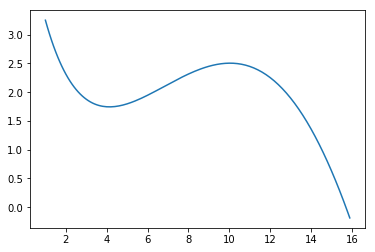

In [107]:
import matplotlib.pyplot as plot
import math
import scipy


def f(x):
  return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)


data_x = np.arange(1, 16, 0.1)
data_y = [f(x) for x in data_x]

plot.plot(data_x, data_y)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина.  
По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства.  
В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из  системы линейных уравнений, где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

### Шаг 1
Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15.   


In [0]:
def create_matrix(points): # вынесем повторяемый код в функции
  matrix = [
      [x**i for i in range(len(points))] 
      for x in points
  ]
  return np.array(matrix)

In [0]:
def approximate(w, vector):
  return np.array([
      sum([w[i]*(v**i) for i in range(len(w))])
      for v in vector
  ])

In [0]:
def solve(points):
  A = create_matrix(points)
  b = [f(x) for x in points]
  w = scipy.linalg.solve(A, b)
  return w, get_approximate_values(w, b)

In [138]:
solve([1, 15])

(array([ 3.43914511, -0.18692825]), [2.8312139167622963, 3.320404285532055])

### Шаг 2
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15

In [139]:
solve([1, 8, 15])

(array([ 3.32512949, -0.06531159, -0.00760104]),
 [3.0323264845598232, 3.133079862354996, 3.280575107020659])

### Шаг 3
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15.   
Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу.   


In [140]:
answer = solve([1, 4, 10, 15])[0]
answer = ' '.join([str(a) for a in answer])
print(answer)

4.362641535118072 -1.2955258656948434 0.1933368470215116 -0.008235651173320554


### Шаг 4
Запишите полученные числа в файл, разделив пробелами.

In [0]:
with open('C1W2 answer 2', 'w') as output_file:
  output_file.write(answer)